# R packages for publication-ready figures and tables

#### Lauren C. Kennedy

I have two objectives for this lesson. First, I want to demonstrate some of my favorite R packages and help you feel comfortable adapting the code for your own work. While doing this, I want to convince you to include your code in future manuscript submissions to journals. 

It is not uncommon to be reading a paper and discover that you have no idea how to replicate someone's analysis based on what is written alone (e.g., references to a "custom pipeline" with no code included in the SI). Further, you could ask for the code and the authors may or may not give it to you! To me, this goes against that rule that academic papers should include a methods section with  enough  detail that allows for replication. Organized code can show both the data analysis process as outlined in the methods section and reproduce the figures/tables in the manuscript when run by a reader (if data are also provided). So why don't more people include their code in their manuscript? I know that when I worked with R scripts, I found it really difficult to read and follow my own code sometimes, and Jupyter notebooks helped me make my data analysis process more presentable and clear. 

## 1. Install & load R packages

Run the box below once and only once to install all of these packages on your computer. To make sure you  don't waste time and reinstall everything again later, you can comment out this box (Mac users: highlight all the text and press "command" + "/")

In [1]:
# install.packages(c("ggplot2", "dplyr","ggpubr", "stargazer", "GGally","viridis","knitr","readr","tidyr"))

In [2]:
#data manipulation/exploration
library(readr)
library(tidyr)
library(GGally)

# plotting
library(ggplot2)
library(viridis)
library(ggpubr)

#tables
library(dplyr)
library(stargazer)

#cite
library(knitr)

options(jupyter.plot_mimetypes = c("text/plain","image/png"))

Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: viridisLite


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Please cite as: 


 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 




In [3]:
#Let's put the figures and tables inside of a folder called figures and tables within the location of this workbook
path=paste(getwd(),"/Figures_and_tables/", sep="")

#sizing in mm based on https://www.elsevier.com/authors/author-schemas/artwork-and-media-instructions/artwork-sizing
min_w=30
single.col_w= 90
half.col_w= 140
max_w= 190
max_h=240


## 2. Load & wrangle dataset

We are going to use the google mobility dataset: "These Community Mobility Reports aim to provide insights into what has changed in response to policies aimed at combating COVID-19. The reports chart movement trends over time by geography, across different categories of places such as retail and recreation, groceries and pharmacies, parks, transit stations, workplaces, and residential."

In [4]:
#download large dataset by desired columns, tell R what each type of column is

world_mobility <- read_csv(url('https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv?cachebust=6de26137c59f7e0d'), col_types = 
 cols_only(country_region=col_character(), 
  sub_region_1=col_character(), 
  sub_region_2=col_character(), 
  date=col_date(), 
  retail_and_recreation_percent_change_from_baseline = col_number(),
  grocery_and_pharmacy_percent_change_from_baseline = col_number(),
  parks_percent_change_from_baseline = col_number(),
  transit_stations_percent_change_from_baseline = col_number(),
  workplaces_percent_change_from_baseline = col_number(),
  residential_percent_change_from_baseline = col_number()))

USA_mobility <- world_mobility[(world_mobility$country_region=='United States'),]  #only in  the US
# rename the columns
colnames(USA_mobility)=c("country","state","county", "date", "retail_and_recreation", "grocery_and_pharmacy","parks","transit_stations","workplaces","residential")

CA_mobility <- USA_mobility[(USA_mobility$state=='California'),] #only in  California
CA_mobility<-CA_mobility[complete.cases(CA_mobility),] #remove   all the NAs
counties=c('Alameda County','Los Angeles County','San Diego County', "San Francisco County","Sacramento County")#narrow the scope a bit
CA_mobility<-CA_mobility[(CA_mobility$county %in% counties),]

AK_mobility <- USA_mobility[(USA_mobility$state=='Arkansas'),]
counties=c('Pulasaki County', 'Benton County', 'Washington County', 'Sebastian County')
AK_mobility<-AK_mobility[(AK_mobility$county %in% counties),]

numeric_CA<-CA_mobility[,(-which(names(CA_mobility) %in% c("date","country","state","county")))] #only numeric columns
head(CA_mobility)
# problems(world_mobility)

Warning message:
“One or more parsing issues, see `problems()` for details”


country,state,county,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
United States,California,Alameda County,2020-02-15,1,0,22,1,0,-1
United States,California,Alameda County,2020-02-16,7,0,24,5,1,-2
United States,California,Alameda County,2020-02-17,13,1,55,-31,-53,11
United States,California,Alameda County,2020-02-18,-2,3,21,3,0,0
United States,California,Alameda County,2020-02-19,-1,0,14,1,0,0
United States,California,Alameda County,2020-02-20,1,1,13,2,0,0


In [5]:
#convert to long format for easy plotting
CA_mobility_long<-gather(CA_mobility, location, percent_relative_change, retail_and_recreation:residential, factor_key=TRUE)
AK_mobility_long<-gather(AK_mobility, location, percent_relative_change, retail_and_recreation:residential, factor_key=TRUE)

head(CA_mobility_long)

country,state,county,date,location,percent_relative_change
<chr>,<chr>,<chr>,<date>,<fct>,<dbl>
United States,California,Alameda County,2020-02-15,retail_and_recreation,1
United States,California,Alameda County,2020-02-16,retail_and_recreation,7
United States,California,Alameda County,2020-02-17,retail_and_recreation,13
United States,California,Alameda County,2020-02-18,retail_and_recreation,-2
United States,California,Alameda County,2020-02-19,retail_and_recreation,-1
United States,California,Alameda County,2020-02-20,retail_and_recreation,1


## 3. Data exploration

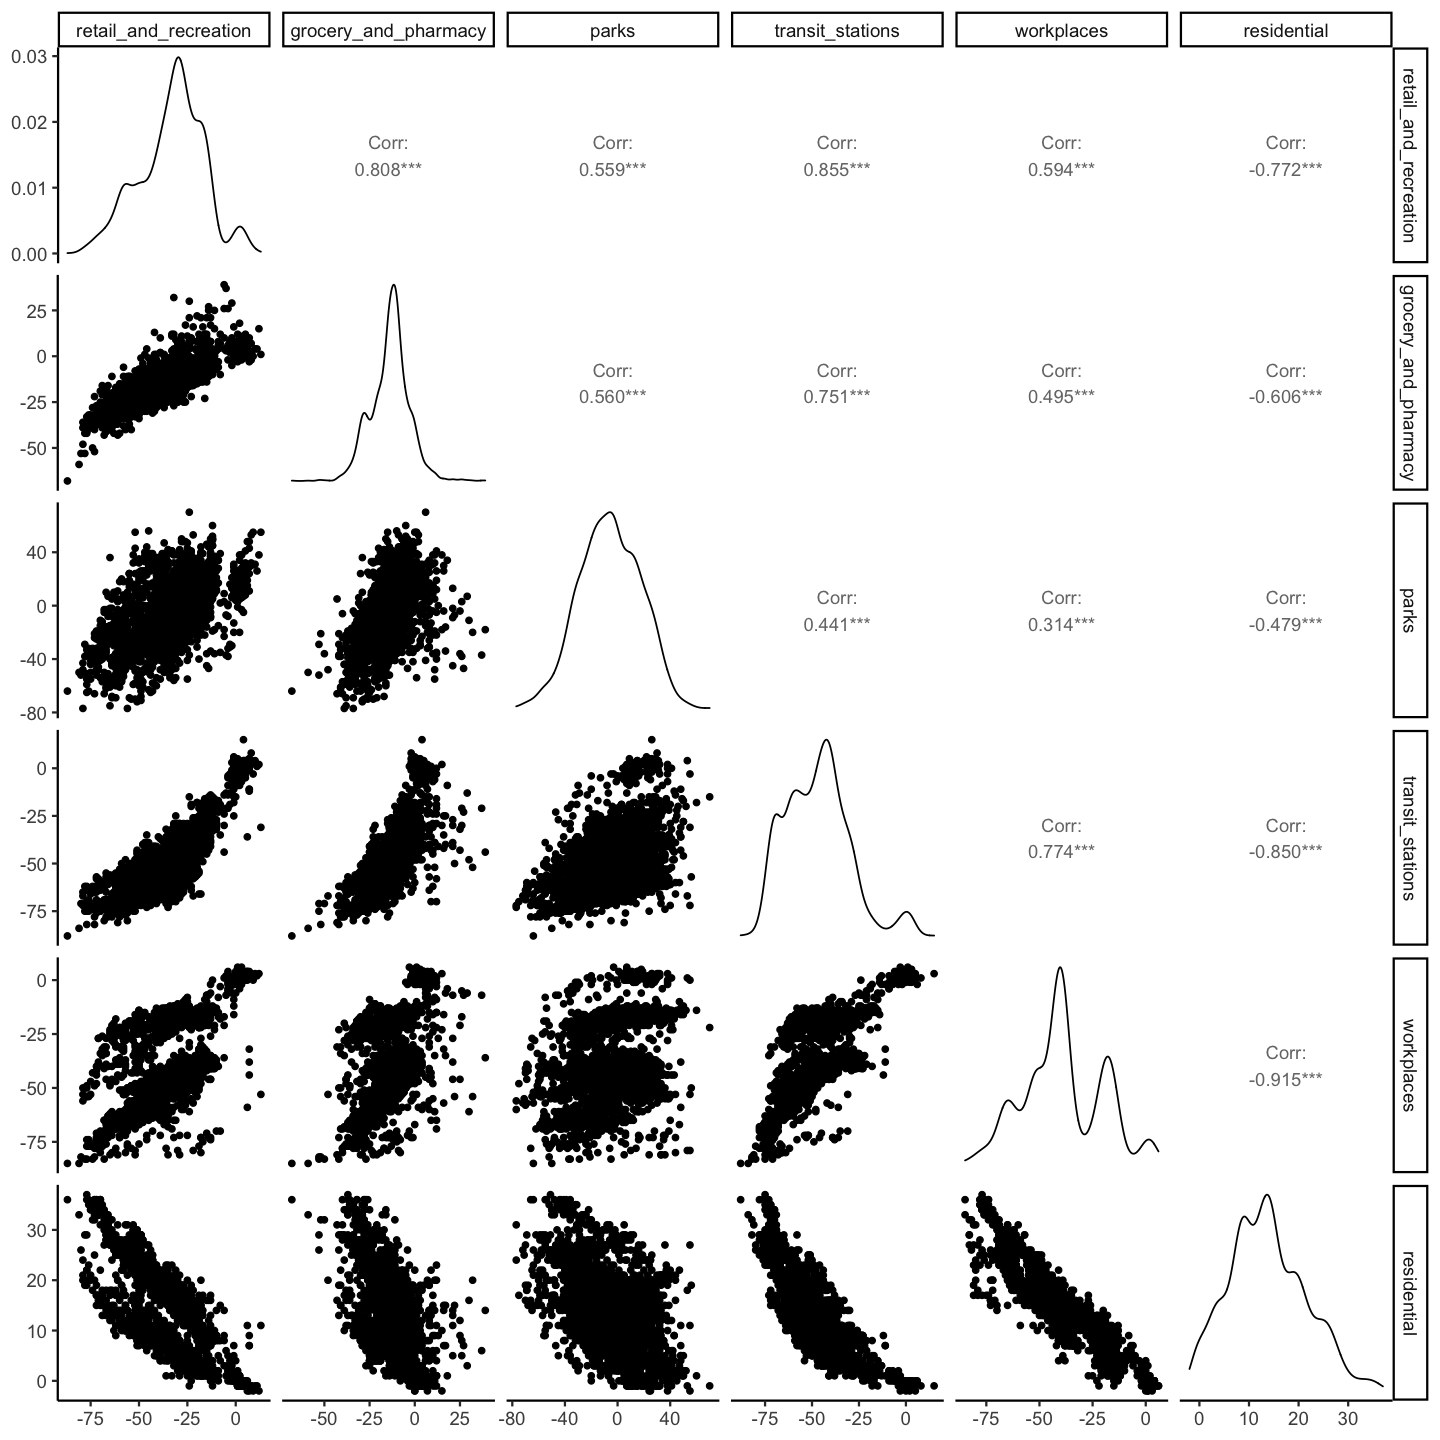

In [6]:
options(repr.plot.width = 12, repr.plot.height = 12) #change the size of the plot
theme_set(theme_classic(base_size=14))# set font size

ggpairs(numeric_CA)


## 3. Plot data (and export in the approprite size)

Let's start with a simple dot plot and distinguish location with color and shape

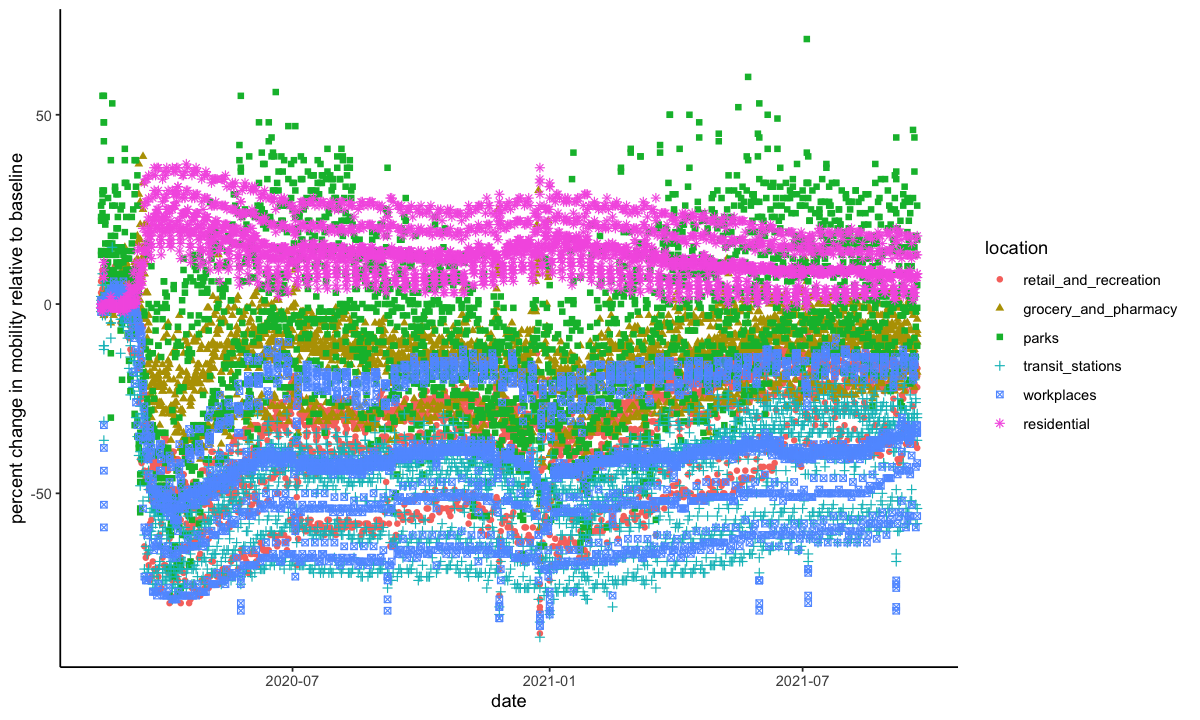

In [7]:
options(repr.plot.width = 10, repr.plot.height = 6) #change the size of the plot
theme_set(theme_classic(base_size=12))# set font size

ggplot(CA_mobility_long, aes_string(x="date", y="percent_relative_change", color="location", shape="location"))+
    geom_point()+
    ylab("percent change in mobility relative to baseline")+
    xlab("date")+
    theme_classic()
# theme(theme_classic(),legend.position="bottom")
# ggsave(paste(path_fig,"Figure_S4.pdf",sep=""),  units='mm',device= cairo_pdf,width=max_w, height=max_h/1.5)

woah that's a bit much for one plot. Let's use facet wrap by location instead!

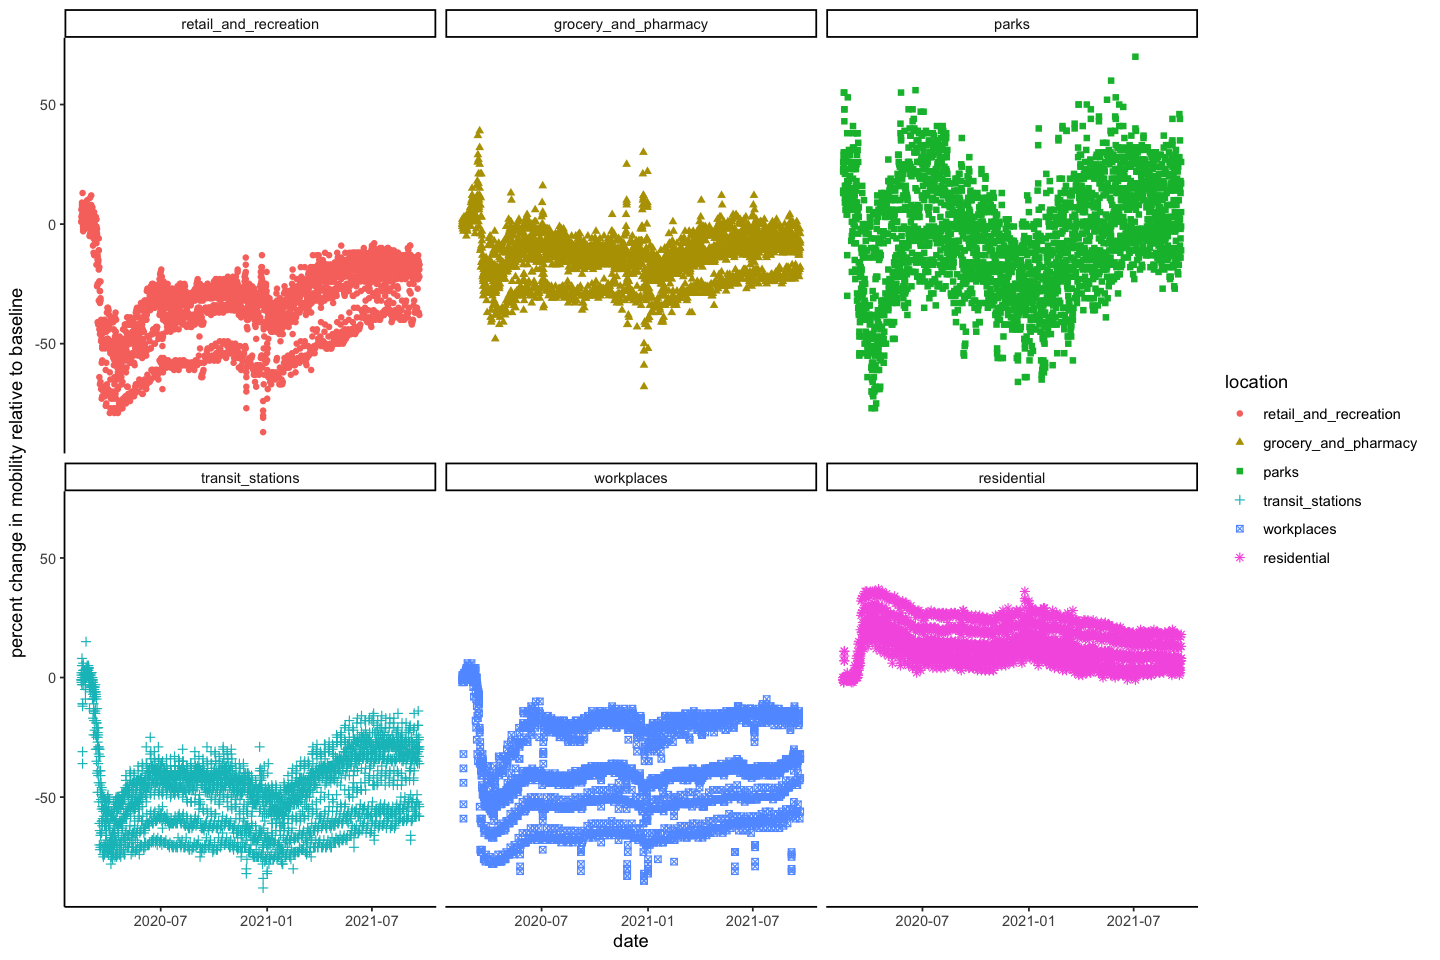

In [8]:
options(repr.plot.width = 12, repr.plot.height = 8) #change the size of the plot
theme_set(theme_classic(base_size=12))# set font size

ggplot(CA_mobility_long, aes_string(x="date", y="percent_relative_change", color="location", shape="location"))+
    geom_point()+
    ylab("percent change in mobility relative to baseline")+
    xlab("date")+
    facet_wrap(~location)+
    theme_classic()

Let's add a few additions to guide the eye, including:
* Vertical line on march 19, 2020 -- roughly when shelter-in-place started in CA
* Vertical line on June 15, 2021 --  when shelter-in-place officially ended in CA
* Horizontal line at 0
* Viridis colors instead of default
* remove the legend

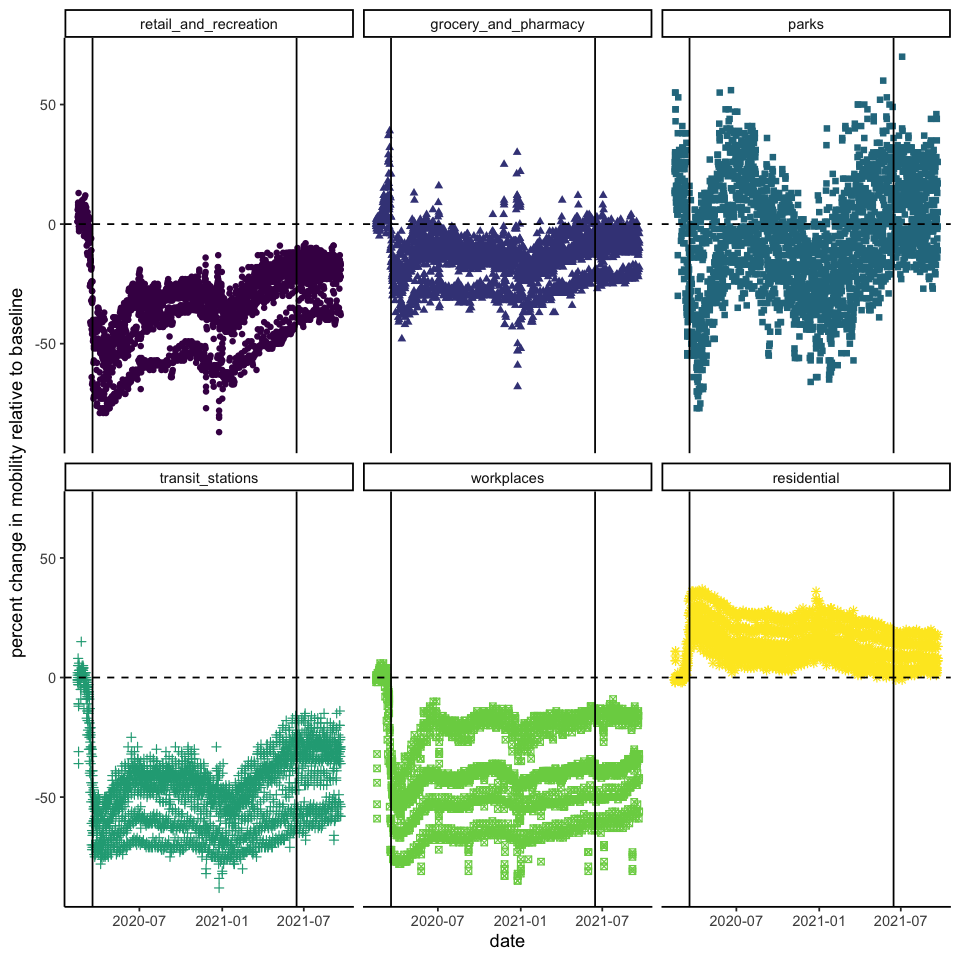

In [9]:
options(repr.plot.width =8, repr.plot.height = 8) #change the size of the plot
theme_set(theme_classic(base_size=16))# set font size

ggplot(CA_mobility_long, aes_string(x="date", y="percent_relative_change", color="location", shape="location"))+
    geom_point()+
    geom_vline(xintercept=as.Date('2020-03-19'))+
    geom_vline(xintercept=as.Date('2021-06-15'))+
    geom_hline(yintercept=0, linetype='dashed')+
    ylab("percent change in mobility relative to baseline")+
    xlab("date")+
    scale_color_viridis_d()+
    facet_wrap(~location)+
    theme_classic()+
    theme(legend.position= "none")

Looks like there are some patterns that are hidden in these data. Let's use facet grid to compare these by county

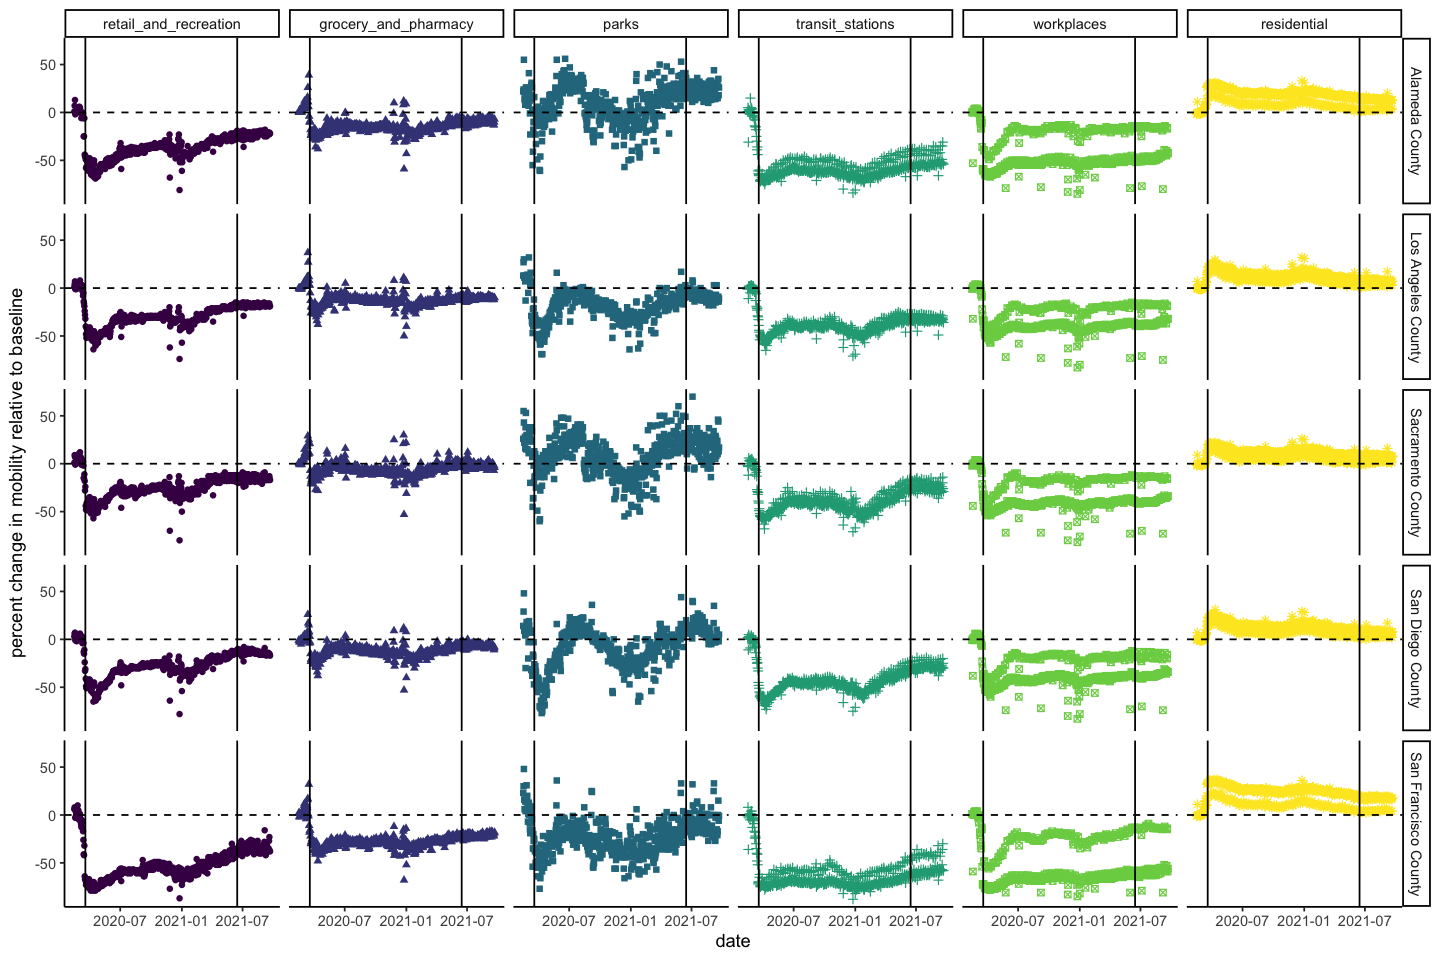

In [10]:
options(repr.plot.width = 12, repr.plot.height = 8) #change the size of the plot
theme_set(theme_classic(base_size=16))# set font size

ggplot(CA_mobility_long, aes_string(x="date", y="percent_relative_change", color="location", shape="location"))+
    geom_point()+
    geom_vline(aes(xintercept=as.Date('2020-03-19')))+
  geom_vline(xintercept=as.Date('2021-06-15'))+
    geom_hline(aes(yintercept=0), linetype='dashed')+
    ylab("percent change in mobility relative to baseline")+
    xlab("date")+
    scale_color_viridis_d()+
    facet_grid(county~location)+
    theme_classic()+
    theme(legend.position= "none")

Let's compare this to the largest counties in a state that didn't shut down, Arkansas

Warning message:
“Removed 627 rows containing missing values (geom_point).”


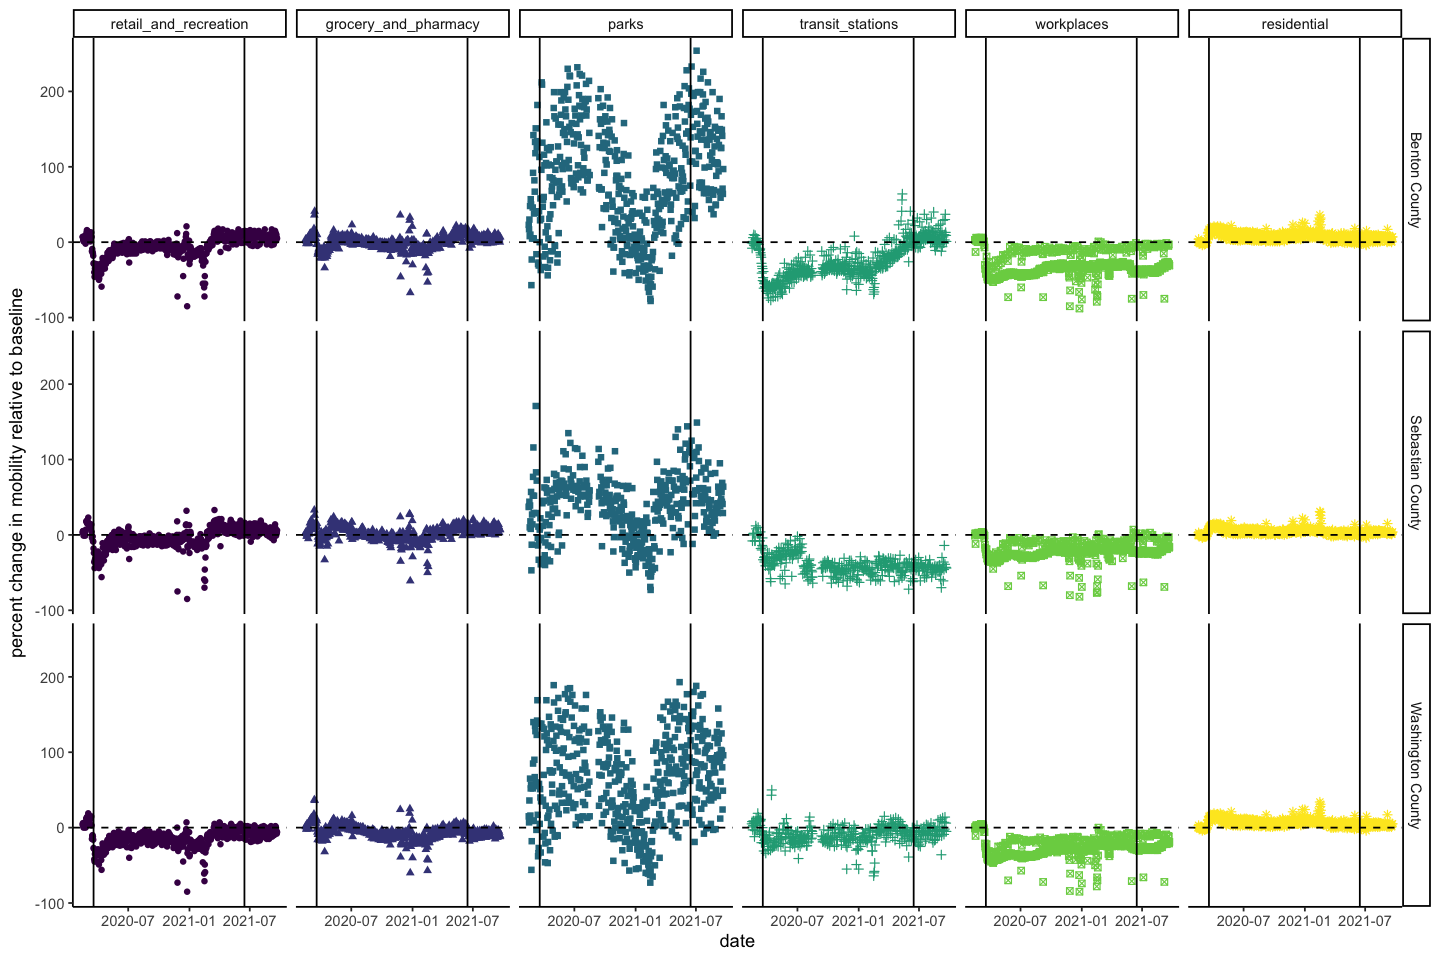

In [11]:
options(repr.plot.width = 12, repr.plot.height = 8) #change the size of the plot
theme_set(theme_classic(base_size=16))# set font size

a=ggplot(AK_mobility_long, aes_string(x="date", y="percent_relative_change", color="location", shape="location"))+
    geom_point()+
    geom_vline(aes(xintercept=as.Date('2020-03-19')))+
     geom_vline(xintercept=as.Date('2021-06-15'))+
    geom_hline(aes(yintercept=0), linetype='dashed')+
    ylab("percent change in mobility relative to baseline")+
    xlab("date")+
    scale_color_viridis_d()+
    facet_grid(county~location)+
    theme_classic()+
    theme(legend.position= "none")
a

Already it is clear that AK is much closer to the baseline after the initial drop for most categories. Let's see them with the same axis limits and make them into one, full-page comparison figure

In [12]:
options(repr.plot.width = 12, repr.plot.height = 12) #change the size of the plot

AK_plot<-ggplot(AK_mobility_long, aes_string(x="date", y="percent_relative_change", color="location", shape="location"))+
    geom_point(size=0.1)+
    geom_vline(aes(xintercept=as.Date('2020-03-19')))+
    geom_vline(xintercept=as.Date('2021-06-15'))+
    geom_hline(aes(yintercept=0), linetype='dashed')+
    ylab("Arkansas\npercent change in mobility relative to baseline")+
    xlab("date")+
    scale_y_continuous(limits=c(-100,200))+
    scale_color_viridis_d()+
    facet_grid(county~location)+
    theme_classic(base_size=8)+
     theme(legend.position= "none", axis.text.x = element_text(angle = 45, vjust = 0.5, hjust=1))

CA_plot<- ggplot(CA_mobility_long, aes_string(x="date", y="percent_relative_change", color="location", shape="location"))+
    geom_point(size=0.1)+
    geom_vline(aes(xintercept=as.Date('2020-03-19')))+
     geom_vline(xintercept=as.Date('2021-06-15'))+
    geom_hline(aes(yintercept=0), linetype='dashed')+
    ylab("California\npercent change in mobility relative to baseline")+
    xlab("date")+
    scale_y_continuous(limits=c(-100,200))+
    scale_color_viridis_d()+
    facet_grid(county~location)+
    theme_classic(base_size=8)+
    theme(legend.position= "none", axis.text.x = element_text(angle = 45, vjust = 0.5, hjust=1))

Warning message:
“Removed 648 rows containing missing values (geom_point).”
Warning message:
“Removed 648 rows containing missing values (geom_point).”


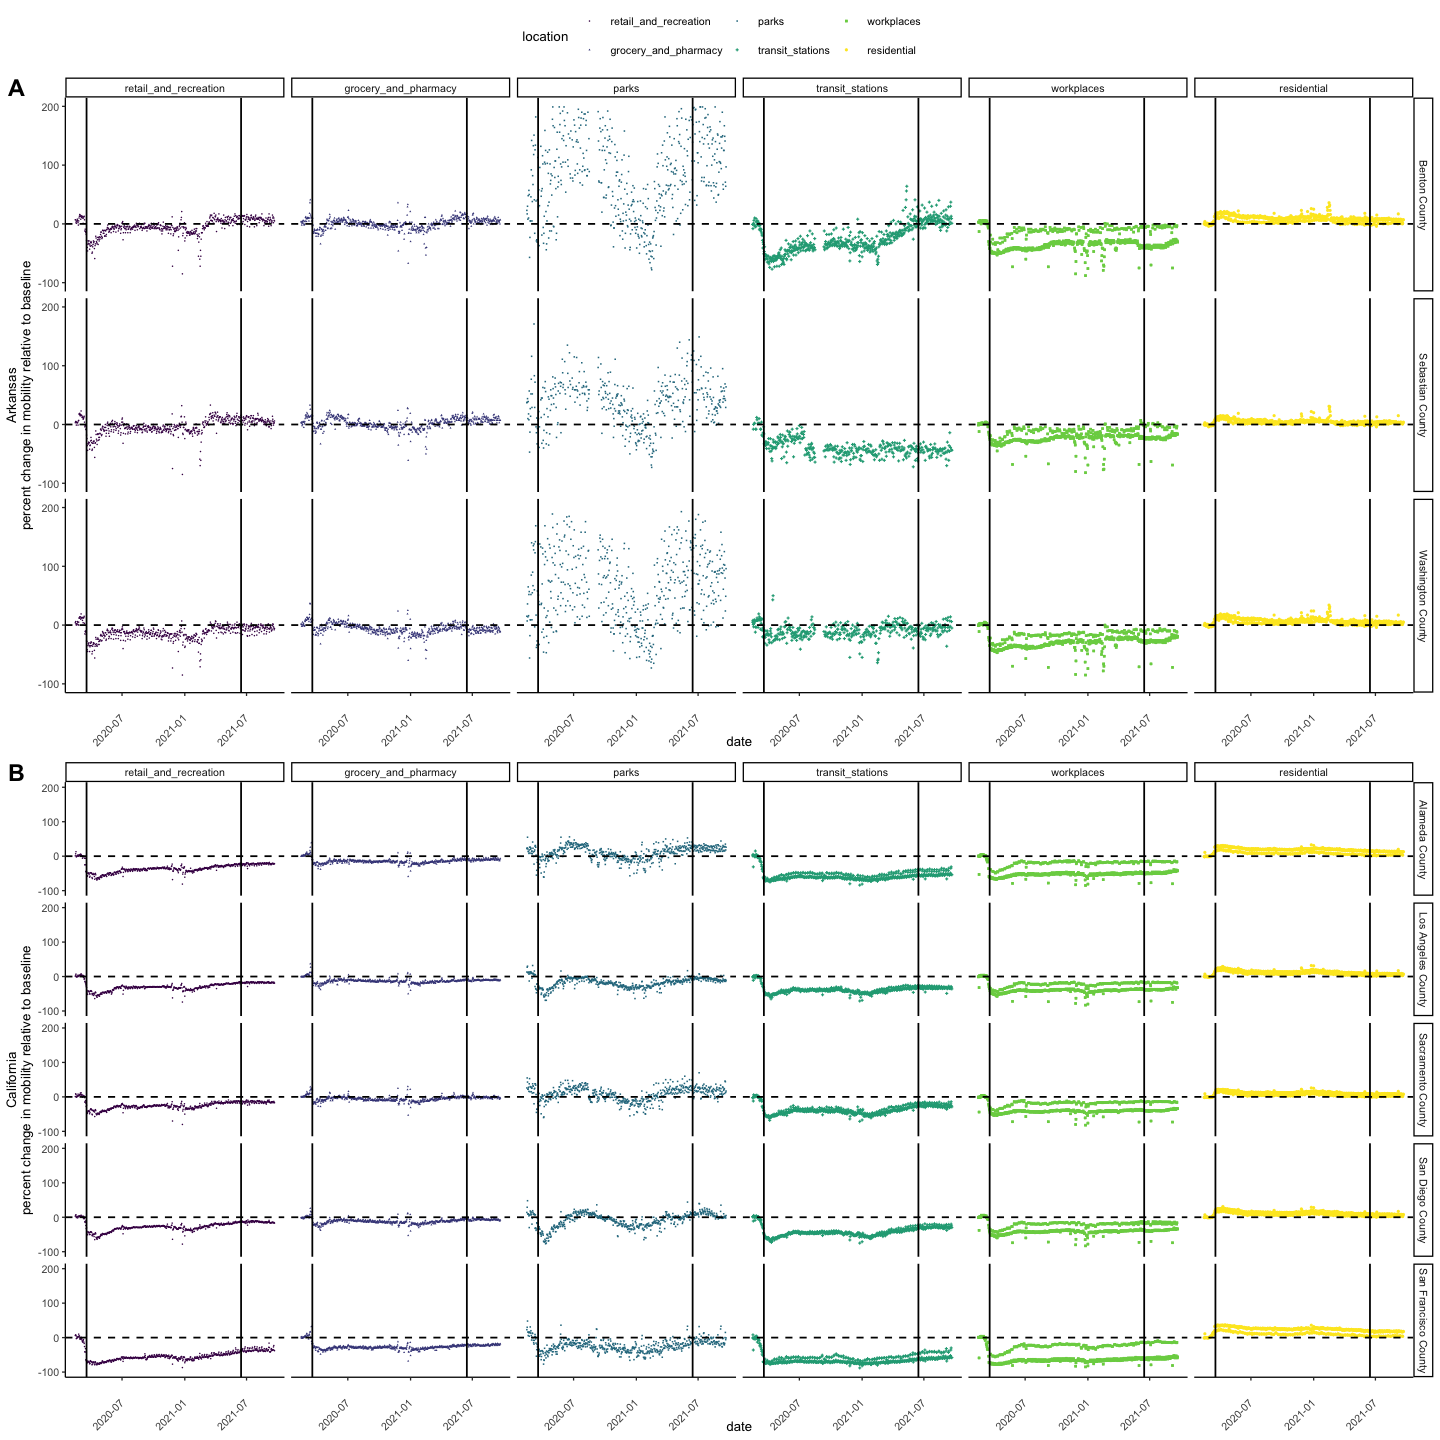

In [13]:

#Figure 1
f1<-ggarrange(AK_plot, CA_plot,
          labels = c("A", "B"),
           ncol = 1, nrow = 2, common.legend=TRUE)

f1

Now let's save this figure in the folder we set at the beginning.

In [14]:
name="Figure_1.pdf"#name the figure
ggsave(paste(path,name,sep=""), plot=f1,device= "pdf", units='mm', width=max_w, height=max_h)

This is where we told ggsave to store the file (path is in step 1 and name was chosen for the figure above)

In [15]:
# paste(path,name,sep="")

## 4. Save formatted tables (as doc files)

Finally, let's compare mobility averages across both states in a table using groupby

In [16]:
#create a month column
USA_mobility$month<-format(as.Date(USA_mobility$date), "%m")
states=c("California", "Arkansas")
comp<-USA_mobility[USA_mobility$state %in% states,]

In [17]:
t1<-comp %>%
  group_by(state,month) %>%
  summarize(counts= as.numeric(n()),
            mean_parks = as.numeric(mean(parks, na.rm = TRUE)),
            mean_retail_recreation = as.numeric(mean(retail_and_recreation, na.rm = TRUE))) %>%
    mutate(counts = format(counts, scientific = TRUE, digits=3), 
           mean_parks = round(mean_parks, 2),
           mean_retail_recreation = round(mean_retail_recreation, 2))%>%
    arrange(month)
t1 <- as.data.frame(t1)
t1

`summarise()` has grouped output by 'state'. You can override using the `.groups` argument.



state,month,counts,mean_parks,mean_retail_recreation
<chr>,<chr>,<chr>,<dbl>,<dbl>
Arkansas,01,1.94e+03,-9.88,-13.45
California,01,1.75e+03,-19.10,-30.07
Arkansas,02,2.78e+03,-10.59,-6.44
California,02,2.43e+03,4.49,-11.88
Arkansas,03,4.10e+03,39.63,-0.32
California,03,3.51e+03,-2.40,-15.59
Arkansas,04,3.88e+03,44.40,-6.43
California,04,3.39e+03,-5.16,-26.81
Arkansas,05,3.87e+03,68.43,2.38


Let's save this as a .doc file so that we can easily add the table to a manuscript

In [18]:
name="Table1.doc" #name the file

stargazer(t1,type="html", summary=FALSE,  out=paste(path,name, sep=""))


<table style="text-align:center"><tr><td colspan="6" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left"></td><td>state</td><td>month</td><td>counts</td><td>mean_parks</td><td>mean_retail_recreation</td></tr>
<tr><td colspan="6" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left">1</td><td>Arkansas</td><td>01</td><td>1.94e+03</td><td>-9.880</td><td>-13.450</td></tr>
<tr><td style="text-align:left">2</td><td>California</td><td>01</td><td>1.75e+03</td><td>-19.100</td><td>-30.070</td></tr>
<tr><td style="text-align:left">3</td><td>Arkansas</td><td>02</td><td>2.78e+03</td><td>-10.590</td><td>-6.440</td></tr>
<tr><td style="text-align:left">4</td><td>California</td><td>02</td><td>2.43e+03</td><td>4.490</td><td>-11.880</td></tr>
<tr><td style="text-align:left">5</td><td>Arkansas</td><td>03</td><td>4.10e+03</td><td>39.630</td><td>-0.320</td></tr>
<tr><td style="text-align:left">6</td><td>California</td><td>03</td><td>3.51e+03</td><td>

## 5. Cite R and the major packages you used

In the methods section, you need to state information about what version of each of the packages you used during data analysis are. An easy way to do this is sessionInfo()

In [19]:
# sessionInfo()

Additionally, you can cite packages that were really important for your analysis as well as R itself. One way to do this is to export all of the citations as a bibTex library that you can import into your citation manager and then choose the package(s) that were key to your analysis.

In [20]:
#following the recommendation from this article https://www.r-bloggers.com/how-to-cite-packages/

name= paste(path,"/R_packages.bib", sep="" )
write_bib(x = .packages(), file=name, tweak = TRUE, width = NULL, 
    prefix = getOption("knitr.bib.prefix", "R-"))

## 6. Make your code and data citable

You can publish your data and jupyter notebook through a website called Zenodo. This site generates an official digital object identifier for your data/code. To do this you need to:
* create a [github account](https://github.com/join)
* upload your jupyter notebook and/or dataset to a repository
* create a [Zenodo account](https://zenodo.org)
* link your github account to your zenodo account
* archive the github repository through zenodo

For more detail, follow [this guide](https://guides.lib.berkeley.edu/citeyourcode) and check out [my example](https://doi.org/10.5281/zenodo.3993877).